# Lecture 19: Convolutional Neural Networks (CNN) II

MTU Spring 2024

Instructor: Abel Reyes

### Announcements

- HW7 grades are in progress
- Quiz 3 grades in progress (yet)
- HW8 will be released this week (due next Wednesday)
- Midterm grades on canvas
- Final course project guidelines on canvas.
- Quiz 4 this Friday!


## Learning outcomes
- Understand several NN layers (CNN, FC, Pooling)
- Understand NN models in Pytorch (image classification)
- Understand NN models in keras (Segmentation task, transfer learning, image colorization)

## Convolutional Neural Network (CNN)

A convolutional neural network (CNN) consists of an input and an output layer, as well as multiple hidden layers. The hidden layers of a CNN typically consist of a series of convolutional layers that convolve with a multiplication or other dot product. The activation function is commonly a REctified Linear Unit (RELU) layer, and is subsequently followed by additional convolutions such as pooling layers, fully connected layers and normalization layers, referred to as hidden layers because their inputs and outputs are masked by the activation function and final convolution. The final convolution, in turn, often involves backpropagation in order to more accurately weight the end product.

To recap, a CNN have

- Convolutional Layers
- Pooling Layers
- Fully Connected Layers
- Nornalization Layers where 2,3,4 are hidden layers.

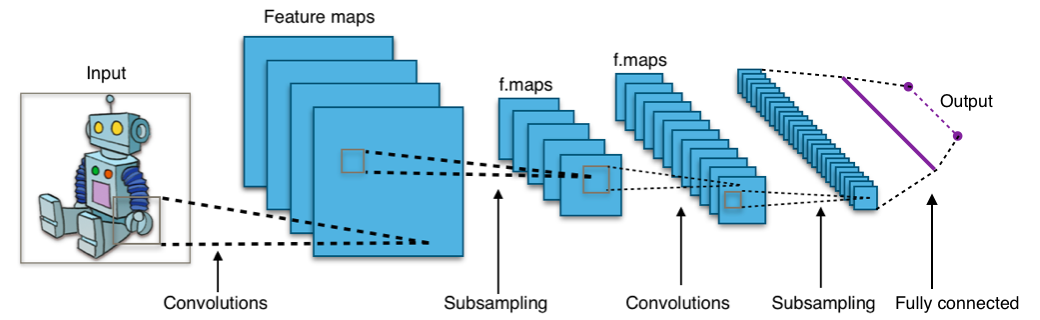

### Convolutional Layers

When programming a CNN, the input is a tensor with shape (number of images, (image width , image height), image depth). Then after passing through a convolutional layer, the image becomes abstracted to a feature map, with shape (number of images, (feature map width, feature map height) , feature map channels). A convolutional layer within a neural network should have the following attributes:

* Convolutional kernels defined by a width and height (hyper-parameters).
* The number of input channels and output channels (hyper-parameter).
* The depth of the Convolution filter (the input channels) must be equal to the number channels (depth) of the input feature map.


Convolutional layers convolve the input and pass its result to the next layer. The convolution operation brings a solution to the problem arising from the presence of a huge number of input data (i.e. the number of pixels) as it reduces the number of free parameters, allowing the network to be deeper with fewer parameters.

The convolutional layer is the core building block of a CNN. The layer's parameters consist of a set of learnable filters (or kernels), which have a small receptive field, but extend through the full depth of the input volume. During the forward pass, each filter is convolved across the width and height of the input volume, computing the dot product between the entries of the filter and the input and producing a 2-dimensional activation map of that filter. As a result, the network learns filters that activate when it detects some specific type of feature at some spatial position in the input.

Stacking the activation maps for all filters along the depth dimension forms the full output volume of the convolution layer. Every entry in the output volume can thus also be interpreted as an output of a neuron that looks at a small region in the input and shares parameters with neurons in the same activation map.

### Pooling

Convolutional networks may include local or global pooling layers to streamline the underlying computation. Pooling layers reduce the dimensions of the data by combining the outputs of neuron clusters at one layer into a single neuron in the next layer. Local pooling combines small clusters, typically 2 x 2.

Global pooling acts on all the neurons of the convolutional layer. In addition, pooling may compute a max or an average. Max pooling uses the maximum value from each of a cluster of neurons at the prior layer. Average pooling uses the average value from each of a cluster of neurons at the prior layer.

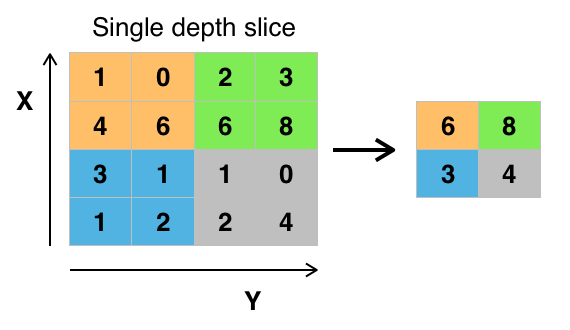


### Fully Connected Layers

**Fully connected**  layers connect every neuron in one layer to every neuron in another layer. It is in principle the same as the traditional multi-layer perceptron neural network (MLP). The flattened matrix goes through a fully connected layer to classify the images.

#### Receptive Fields
In neural networks, each neuron receives input from some number of locations in the previous layer. In a fully connected layer, each neuron receives input from every element of the previous layer. In a convolutional layer, neurons receive input from only a restricted subarea of the previous layer. Typically the subarea is of a square shape (e.g., size 5 by 5). The input area of a neuron is called its  **receptive field**.

So:

* in a **fully connected layer** , the receptive field is the entire previous layer.
* In a **convolutional layer** , the receptive area is smaller than the entire previous layer.

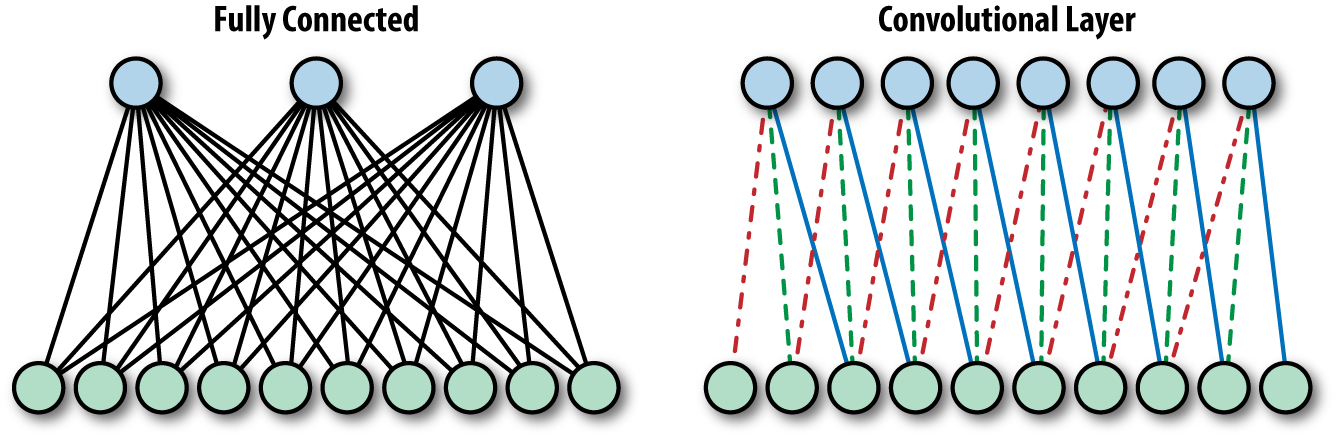

## Image Classification Model using Pytorch

## 1. Load and Normalize the dataset (CIFAR10)

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.
[Source](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

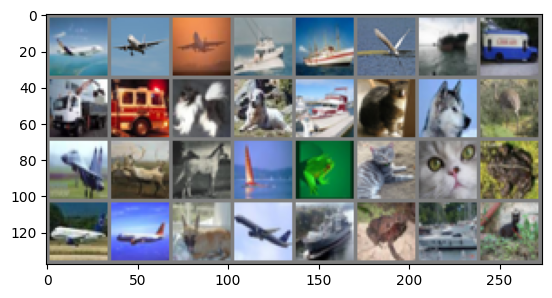

plane plane plane ship  ship  bird  ship  truck truck truck dog   dog   ship  cat   dog   bird  plane deer  horse ship  frog  cat   cat   frog  plane plane dog   plane ship  frog  ship  cat  


In [13]:


# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 2. Define a Convolutional Neural Network


In [14]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) ##(Input channels, output channels, kernel size)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [15]:
net = Net()

## 3. Define a Loss function and optimizer


In [16]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## 3.5 Training on GPU
Just like how you transfer a Tensor onto the GPU, you transfer the neural net onto the GPU.

Let’s first define our device as the first visible cuda device if we have CUDA available:

In [17]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [18]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

## 4. Train the network
This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [20]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)  ## Using GPU
        #inputs, labels = data ### Use only CPU

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() ##updating

        # print statistics
        running_loss += loss.item()
        if i % 250 == 249:    # print every 250 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 250:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   250] loss: 1.131
[1,   500] loss: 1.120
[1,   750] loss: 1.125
[1,  1000] loss: 1.091
[1,  1250] loss: 1.082
[1,  1500] loss: 1.131
[2,   250] loss: 1.070
[2,   500] loss: 1.099
[2,   750] loss: 1.076
[2,  1000] loss: 1.075
[2,  1250] loss: 1.098
[2,  1500] loss: 1.067
[3,   250] loss: 1.036
[3,   500] loss: 1.043
[3,   750] loss: 1.079
[3,  1000] loss: 1.042
[3,  1250] loss: 1.051
[3,  1500] loss: 1.029
[4,   250] loss: 1.044
[4,   500] loss: 0.999
[4,   750] loss: 1.008
[4,  1000] loss: 1.034
[4,  1250] loss: 1.028
[4,  1500] loss: 1.024
[5,   250] loss: 0.995
[5,   500] loss: 0.984
[5,   750] loss: 0.988
[5,  1000] loss: 1.005
[5,  1250] loss: 1.007
[5,  1500] loss: 1.000
[6,   250] loss: 0.967
[6,   500] loss: 0.969
[6,   750] loss: 0.985
[6,  1000] loss: 0.970
[6,  1250] loss: 0.975
[6,  1500] loss: 0.955
[7,   250] loss: 0.941
[7,   500] loss: 0.959
[7,   750] loss: 0.924
[7,  1000] loss: 0.957
[7,  1250] loss: 0.948
[7,  1500] loss: 0.961
[8,   250] loss: 0.902
[8,   500] 

Let’s quickly save our trained model:


In [22]:

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## 5. Test the network on the test data
We have trained the network for 2 passes over the training dataset. But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

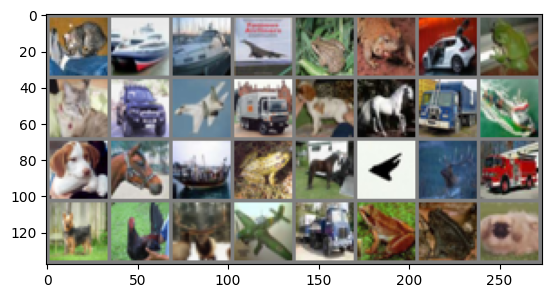

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog  cat   car   plane truck dog   horse truck ship  dog   horse ship  frog  horse plane deer  truck dog   bird  deer  plane truck frog  frog  dog  


In [24]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(32)))

Next, let’s load back in our saved model (note: saving and re-loading the model wasn’t necessary here, we only did it to illustrate how to do so):

In [25]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [27]:
outputs = net(images)

In [28]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(32)))

Predicted:  cat   car   car   ship  deer  frog  car   bird  cat   car   deer  truck deer  horse truck frog  dog   truck ship  frog  horse bird  deer  truck deer  deer  deer  plane car   frog  frog  deer 


The results seem pretty good.

Let us look at how the network performs on the whole dataset.

In [29]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 64 %


That looks way better than chance, which is 10% accuracy (randomly picking a class out of 10 classes). Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did not perform well:

In [30]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 70.3 %
Accuracy for class: car   is 76.5 %
Accuracy for class: bird  is 44.7 %
Accuracy for class: cat   is 39.6 %
Accuracy for class: deer  is 70.4 %
Accuracy for class: dog   is 54.3 %
Accuracy for class: frog  is 71.7 %
Accuracy for class: horse is 67.7 %
Accuracy for class: ship  is 72.9 %
Accuracy for class: truck is 72.1 %


## Image Segmentation with Keras

### What is image segmentation?

In an image classification task, the network assigns a label (or class) to each input image. However, suppose you want to know the shape of that object, which pixel belongs to which object, etc. In this case, you need to assign a class to each pixel of the image—this task is known as segmentation. A segmentation model returns much more detailed information about the image. Image segmentation has many applications in medical imaging, self-driving cars and satellite imaging, just to name a few.

### U-Net Architecture

U-Net was introduced in the paper, U-Net: Convolutional Networks for Biomedical Image Segmentation. The model architecture is fairly simple: an encoder (for downsampling) and a decoder (for upsampling) with skip connections. As the Figure shows, it shapes like the letter U hence the name U-Net.

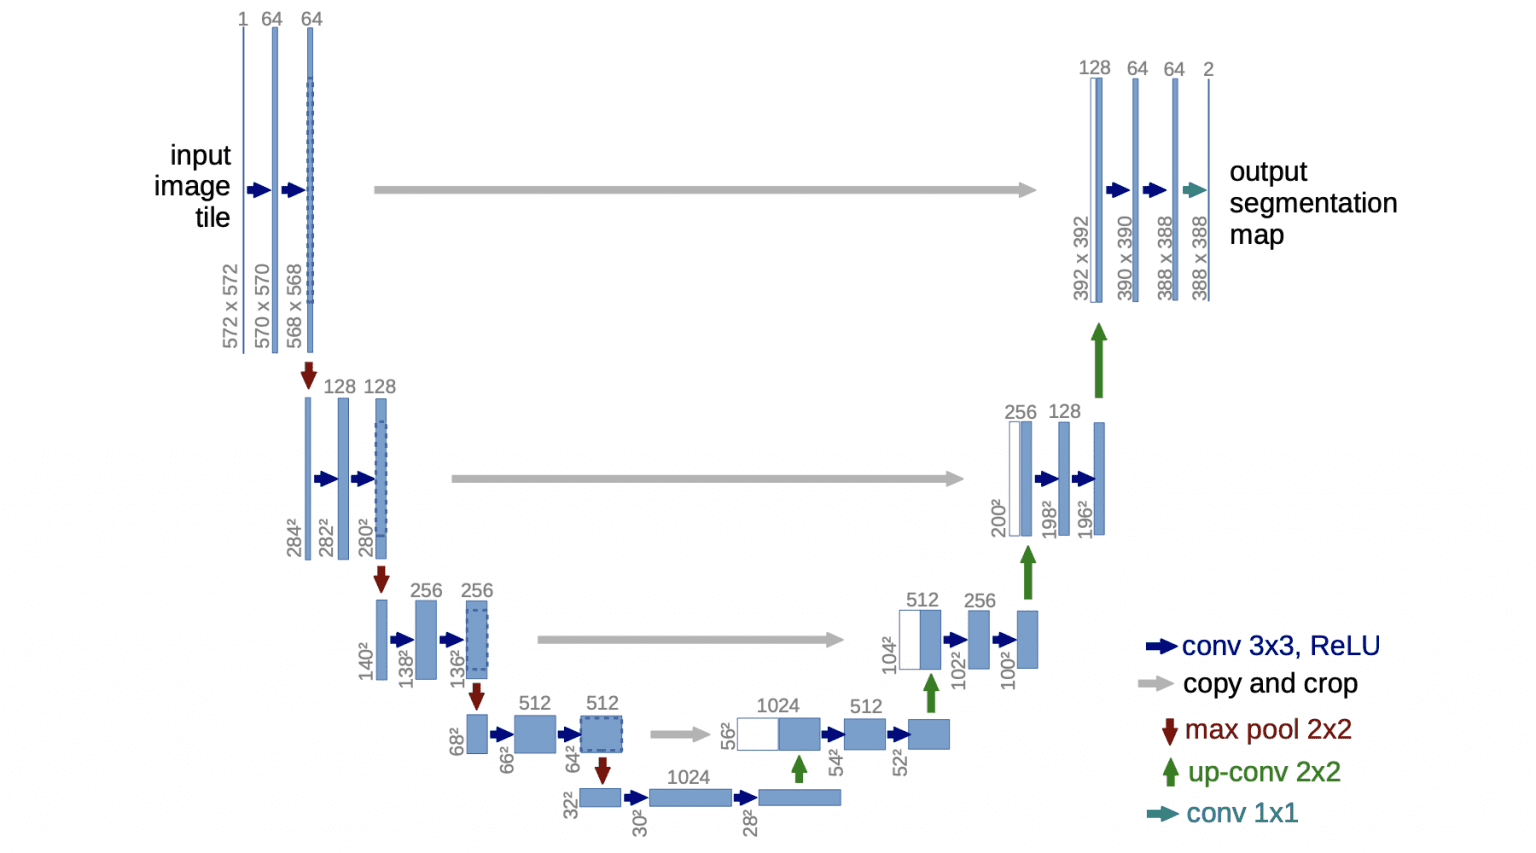

The gray arrows indicate the skip connections that concatenate the encoder feature map with the decoder, which helps the backward flow of gradients for improved training.

Now that we have a basic understanding of semantic segmentation and the U-Net architecture, let’s implement a U-Net with TensorFlow 2 / Keras.

In [2]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

import os
import glob
from sklearn.model_selection import train_test_split
from PIL import Image
from keras import backend as K


In [3]:
def unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])

    
    return model

### PH^2 dataset
The increasing incidence of melanoma has recently promoted the development of computer-aided diagnosis systems for the classification of dermoscopic images. The PH² dataset has been developed for research and benchmarking purposes, in order to facilitate comparative studies on both segmentation and classification algorithms of dermoscopic images. PH² is a dermoscopic image database acquired at the Dermatology Service of Hospital Pedro Hispano, Matosinhos, Portugal.

[source](https://www.fc.up.pt/addi/ph2%20database.html)

In [5]:
root="data/PH2/PH2Dataset/PH2 Dataset images"
size=128


In [6]:
def reading_images(root_path, files, type_im):
    images=[]
    for file in files:
        with h5py.File(root_path + file, 'r') as img_file:
            img_for_plot = img_file[type_im][()]
            images.append(img_for_plot)
    return images

def jaccard_distance(y_true, y_pred, smooth=100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac)

In [7]:
imgs_path_list = sorted(filter(os.path.isfile,glob.glob(root+'/**/'+"**Dermoscopic_Image/"+'*bmp')))
masks_path_list = sorted(filter(os.path.isfile,glob.glob(root+'/**/'+"**lesion/"+'*bmp')))

masks=[]
imgs=[]
for idx in range(len(imgs_path_list)):
    img=np.array(Image.open(imgs_path_list[idx]).resize((size,size)), dtype=np.float32)/255
    mask=np.array(Image.open(masks_path_list[idx]).resize((size,size)), dtype=np.float32)
    #print(img.shape)
    imgs.append(img)
    masks.append(mask)
masks_arr=np.array(masks)
imgs_arr=np.array(imgs)
imgs_arr.shape

(200, 128, 128, 3)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(imgs_arr, masks_arr, test_size = 0.25, random_state = 101)

In [9]:
def display_images_and_masks(X_train, y_train):
    """
    Display 5 random images from X_train with their corresponding segmentation masks from y_train.
    
    Parameters:
    - X_train: numpy array of images.
    - y_train: numpy array of segmentation masks.
    """
    # Ensure there are at least 5 images
    assert len(X_train) >= 5, "X_train must contain at least 5 images."
    assert len(y_train) >= 5, "y_train must contain at least 5 masks."
    
    # Randomly select 5 unique indices
    indices = np.random.choice(len(X_train), 5, replace=False)
    
    fig, axes = plt.subplots(5, 2, figsize=(10, 20))
    
    for i, index in enumerate(indices):
        ax = axes[i, 0]
        ax.imshow(X_train[index], cmap='gray')
        ax.set_title(f"Image {index}")
        ax.axis('off')
        
        ax = axes[i, 1]
        ax.imshow(y_train[index], cmap='gray')
        ax.set_title(f"Mask {index}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

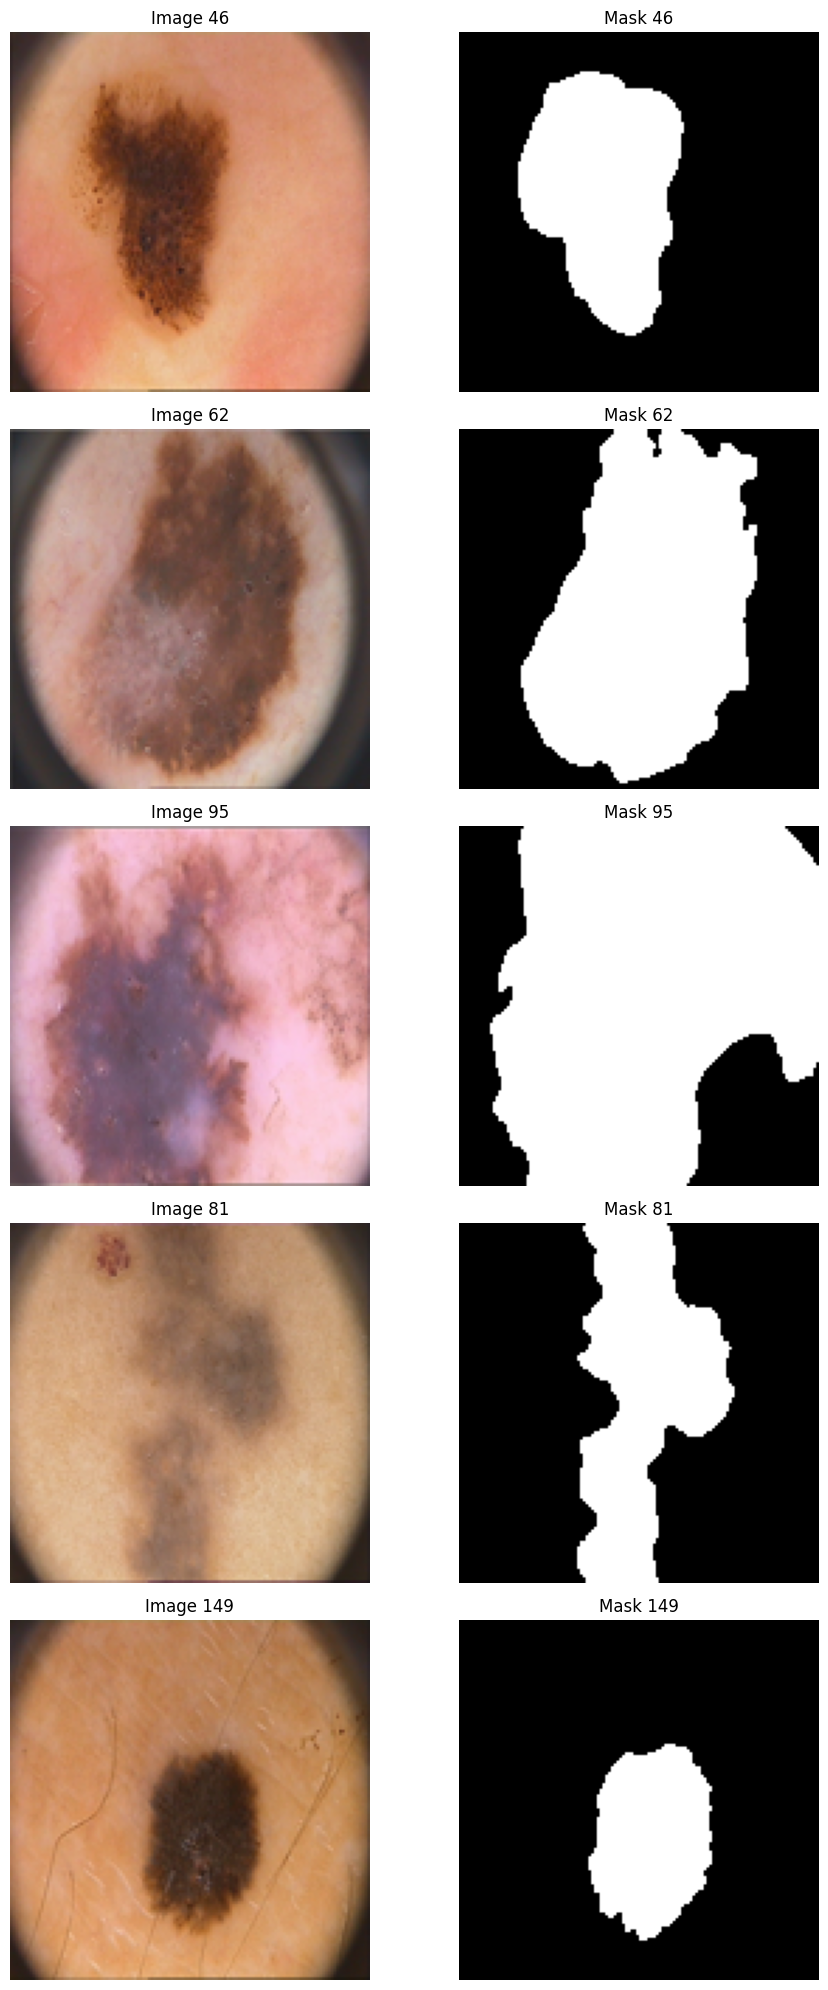

In [10]:
display_images_and_masks(X_train, y_train)

In [11]:
model=unet_model(size, size, 3)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 16  0           ['conv2d[0][0]']                 
                                )                                                             

 conv2d_transpose_3 (Conv2DTran  (None, 128, 128, 16  2064       ['conv2d_15[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatenate_3 (Concatenate)    (None, 128, 128, 32  0           ['conv2d_transpose_3[0][0]',     
                                )                                 'conv2d_1[0][0]']               
                                                                                                  
 conv2d_16 (Conv2D)             (None, 128, 128, 16  4624        ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 dropout_8 (Dropout)            (None, 128, 128, 16  0           ['conv2d_16[0][0]']              
          

In [13]:
model.compile(optimizer= Adam(learning_rate = 0.001), 
              metrics=['accuracy'], 
              loss=  jaccard_distance
             )


In [14]:
model_history=model.fit(X_train, y_train,
                       batch_size=32,
                       epochs=50,
                        verbose=1,
                       validation_data=(X_test, y_test),
                        shuffle=True
                       )


Epoch 1/25
5/5 [==============================] - 7s 393ms/step - loss: 0.2187 - accuracy: 0.4703 - val_loss: 0.1993 - val_accuracy: 0.7569
Epoch 2/25
5/5 [==============================] - 0s 54ms/step - loss: 0.1897 - accuracy: 0.6714 - val_loss: 0.1597 - val_accuracy: 0.6864
Epoch 3/25
5/5 [==============================] - 0s 53ms/step - loss: 0.1629 - accuracy: 0.6754 - val_loss: 0.1384 - val_accuracy: 0.6959
Epoch 4/25
5/5 [==============================] - 0s 54ms/step - loss: 0.1450 - accuracy: 0.7321 - val_loss: 0.1176 - val_accuracy: 0.8236
Epoch 5/25
5/5 [==============================] - 0s 53ms/step - loss: 0.1270 - accuracy: 0.7882 - val_loss: 0.1038 - val_accuracy: 0.8336
Epoch 6/25
5/5 [==============================] - 0s 53ms/step - loss: 0.1217 - accuracy: 0.7919 - val_loss: 0.1052 - val_accuracy: 0.8363
Epoch 7/25
5/5 [==============================] - 0s 53ms/step - loss: 0.1180 - accuracy: 0.8091 - val_loss: 0.0985 - val_accuracy: 0.8291
Epoch 8/25
5/5 [==========

In [15]:
import pandas as pd

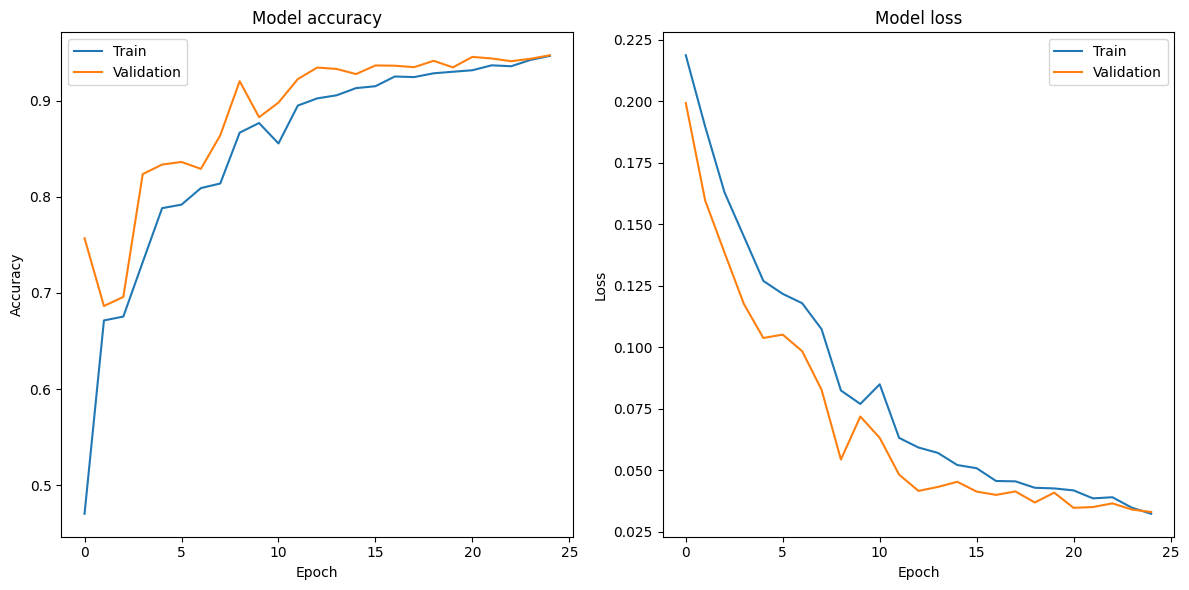

In [16]:
#%%
# Save the training history to a CSV file
history_df = pd.DataFrame(model_history.history)
history_df.to_csv(f"training_history.csv", index=False)
#%%
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'], label='Train')
plt.plot(model_history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'], label='Train')
plt.plot(model_history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.tight_layout()



In [17]:
predictions=model.predict(X_test)>0.5

2/2 [==============================] - 0s 242ms/step


In [18]:
def display_images_masks_predictions(X_train, y_train, predictions):
    """
    Display 5 random images from X_train with their corresponding segmentation masks from y_train
    and predicted masks from predictions.
    
    Parameters:
    - X_train: numpy array of images.
    - y_train: numpy array of true segmentation masks.
    - predictions: numpy array of predicted segmentation masks.
    """
    # Ensure there are at least 5 images and consistency in dataset size
    assert len(X_train) >= 5, "X_train must contain at least 5 images."
    assert len(y_train) >= 5, "y_train must contain at least 5 masks."
    assert len(predictions) >= 5, "predictions must contain at least 5 masks."
    assert len(X_train) == len(y_train) == len(predictions), "X_train, y_train, and predictions must have the same length."
    
    # Randomly select 5 unique indices
    indices = np.random.choice(len(X_train), 5, replace=False)
    
    fig, axes = plt.subplots(5, 3, figsize=(15, 20))  # Adjusted for 3 columns
    
    for i, index in enumerate(indices):
        # Display the original image
        ax = axes[i, 0]
        ax.imshow(X_train[index], cmap='gray')
        ax.set_title(f"Image {index}")
        ax.axis('off')
        
        # Display the true mask
        ax = axes[i, 1]
        ax.imshow(y_train[index], cmap='gray')
        ax.set_title(f"True Mask {index}")
        ax.axis('off')
        
        # Display the predicted mask
        ax = axes[i, 2]
        ax.imshow(predictions[index], cmap='gray')
        ax.set_title(f"Predicted Mask {index}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

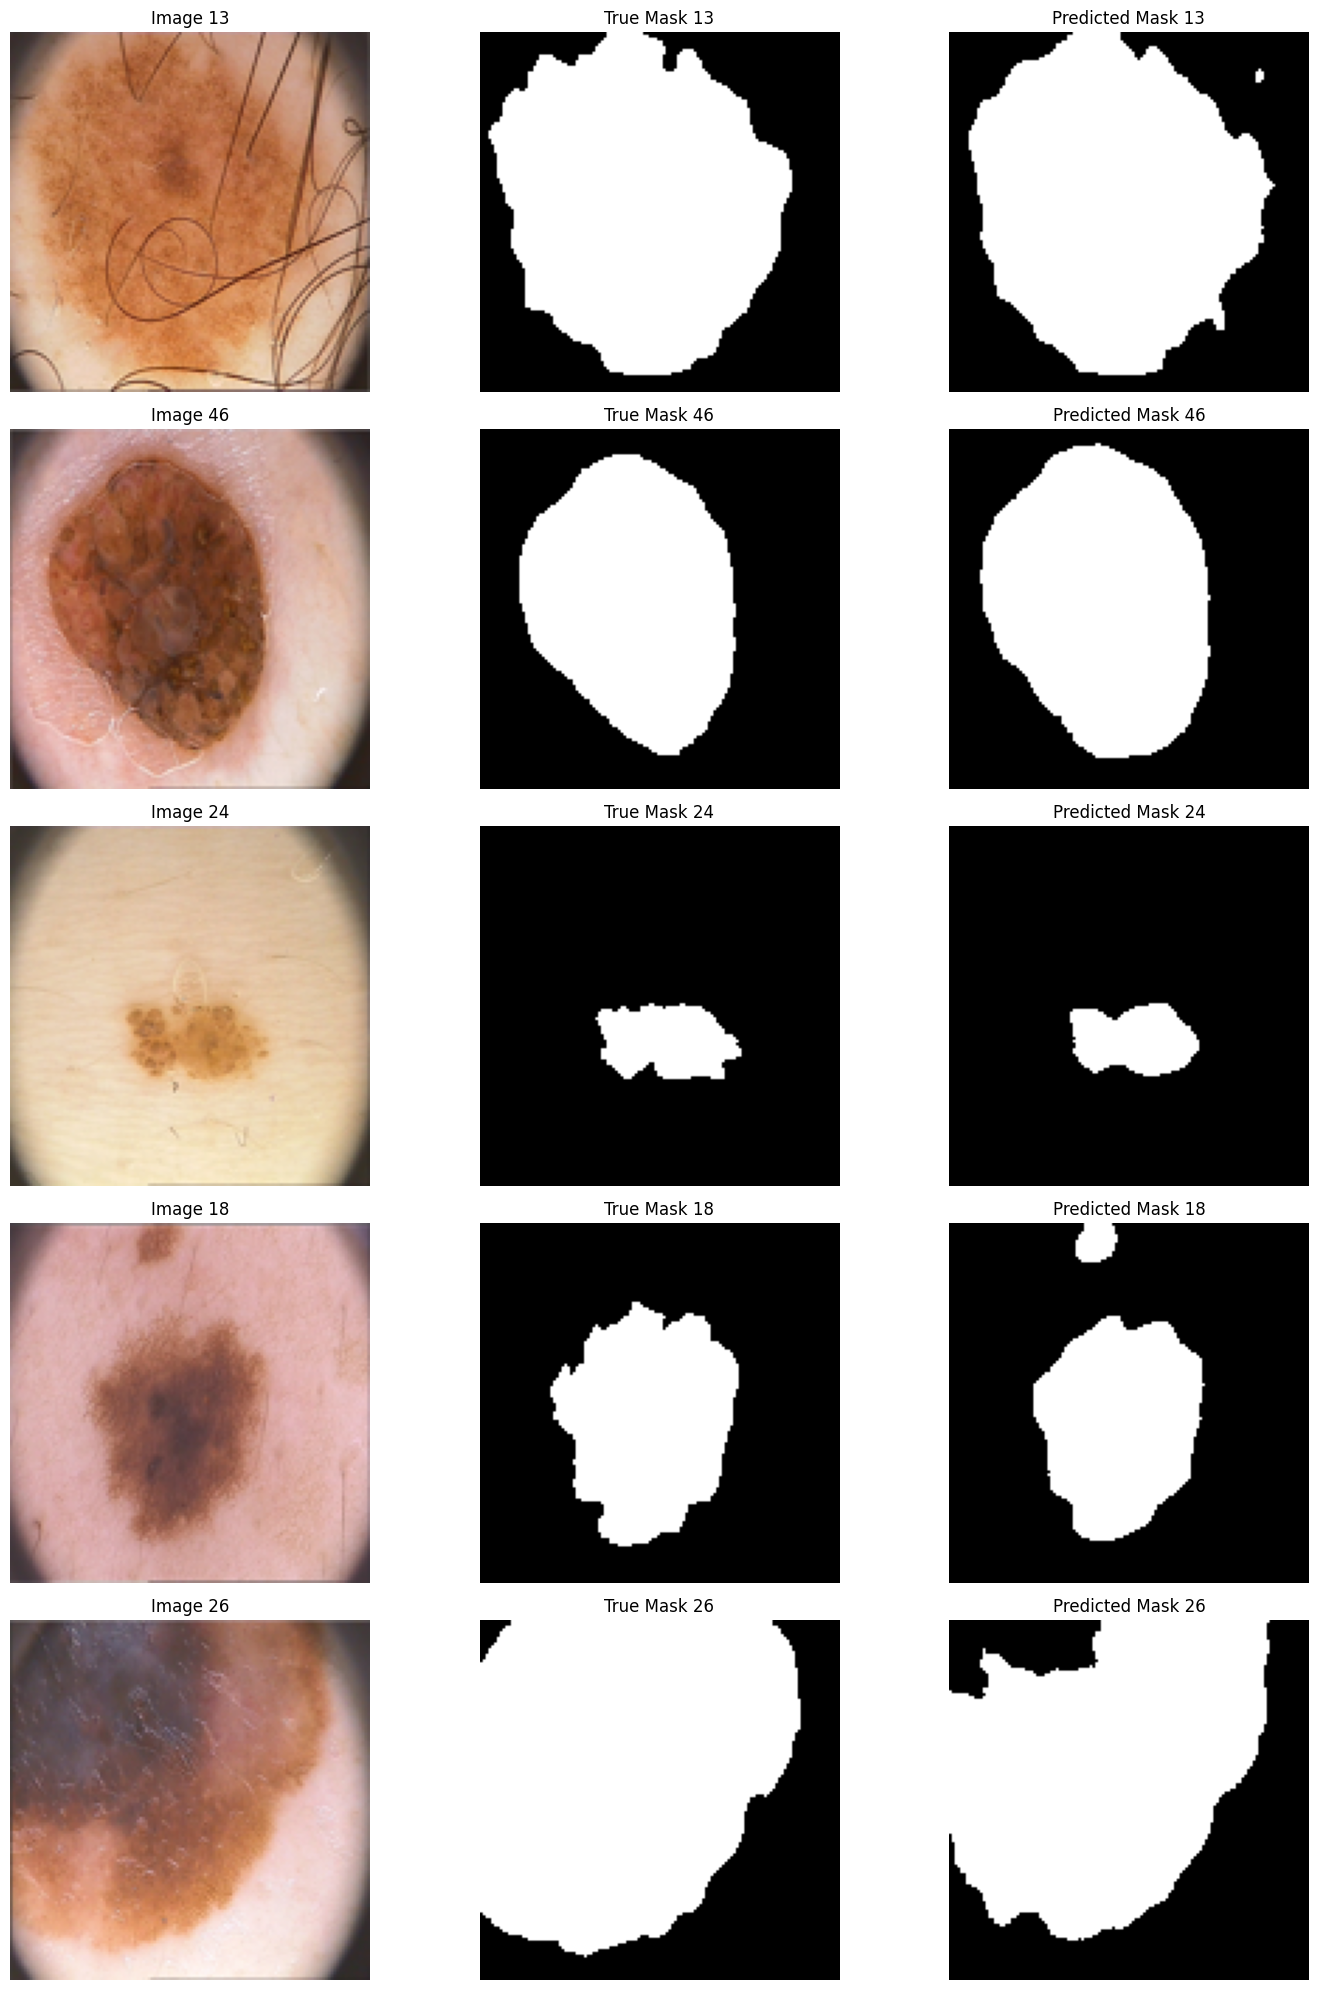

In [20]:
display_images_masks_predictions(X_test, y_test, predictions)

In [24]:
predictions.shape, y_test.shape

((50, 128, 128, 1), (50, 128, 128))

In [22]:
def mean_iou(y_test, predictions):
    """
    Compute the mean Intersection over Union (IoU) between two arrays of segmentation masks.
    
    Parameters:
    - y_test: numpy array of true segmentation masks.
    - predictions: numpy array of predicted segmentation masks.
    
    Returns:
    - mean_iou: The mean IoU score across all samples.
    """
    # Ensure predictions and ground truth have the same shape
    assert y_test.shape == predictions.shape, "Shape mismatch between ground truth and predictions"
    
    # Initialize list to store IoU scores
    iou_scores = []
    
    for true_mask, pred_mask in zip(y_test, predictions):
        # Intersection and union
        intersection = np.logical_and(true_mask, pred_mask)
        union = np.logical_or(true_mask, pred_mask)
        
        # Avoid division by zero
        iou_score = np.sum(intersection) / np.sum(union) if np.sum(union) != 0 else 0
        iou_scores.append(iou_score)
    
    # Calculate mean IoU
    mean_iou = np.mean(iou_scores)
    return mean_iou

In [25]:
print(f'The mean Intersection over Union is: {mean_iou(np.expand_dims(y_test, axis=-1), predictions)}')

The mean Intersection over Union is: 0.8423677454753029


In [26]:
model.save('unet_model_melanoma.hdf5')

In [ ]:
##Load weights
model.load('unet_model_melanoma.hdf5')

In [28]:

## Load entire model
new_model = tf.keras.models.load_model('unet_model_melanoma.hdf5', compile=False)

In [29]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 16  0           ['conv2d[0][0]']                 
                                )                                                             

 conv2d_transpose_3 (Conv2DTran  (None, 128, 128, 16  2064       ['conv2d_15[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatenate_3 (Concatenate)    (None, 128, 128, 32  0           ['conv2d_transpose_3[0][0]',     
                                )                                 'conv2d_1[0][0]']               
                                                                                                  
 conv2d_16 (Conv2D)             (None, 128, 128, 16  4624        ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 dropout_8 (Dropout)            (None, 128, 128, 16  0           ['conv2d_16[0][0]']              
          